In [32]:
import numpy as np
import pandas as pd
import datetime as dt
import calendar
#import pycountry_convert as pc
#import pycountry as pctry
import yfinance as yf
%matplotlib inline

import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact

In [33]:
import yfinance as yf
tickersY = yf.Tickers('VTSAX IYZ XLB XLY XLP XLE IYF XLV XLI XLK IYR XLU IBB ITA SOXX ITB')
df_hist=tickersY.history(start='2000-01-01', end='2020-06-04')
sector_df=df_hist['Close']
sector_df.columns=(['Total Stock Market','Communications', 'Materials', 'Consumer Discretionary', 'Consumer Staples',
                   'Energy', 'Financials', 'Health Care', 'Industrial', 'Technology', 'Real Estate',
                   'Utilities', 'BioTech', 'Defense', 'Semiconductor', 'Home Construction'])
sector_df

[*********************100%***********************]  16 of 16 completed


,Total Stock Market,Communications,Materials,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrial,Technology,Real Estate,Utilities,BioTech,Defense,Semiconductor,Home Construction
Date,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.283916,16.885973,19.811380,43.262833,14.231282,13.261072,22.506960,23.411850
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.127146,16.568123,19.264048,41.067986,13.830540,12.861057,21.996243,22.707548
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.793398,17.005169,19.178183,40.458302,14.074896,13.185598,21.798914,22.428253
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.224506,17.660740,19.435760,39.117016,14.338801,13.162952,21.868551,22.683264
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.214706,17.849464,20.176273,39.799858,15.247807,13.276170,22.135530,23.751852
2000-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.155926,17.700474,20.176273,41.311848,14.905700,13.321451,24.398996,23.630426
2000-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.950165,17.720337,19.918701,40.141273,14.905700,13.178049,23.748970,23.496857
2000-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.705219,17.640875,19.682604,39.970570,14.983905,13.042196,23.354315,23.363274
2000-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.773804,17.948792,20.058218,40.336380,15.062097,12.921436,24.050768,23.484705


In [34]:
sector_df_stddev=sector_df.pct_change()

In [35]:
sector_df_stddev.head()

,Total Stock Market,Communications,Materials,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrial,Technology,Real Estate,Utilities,BioTech,Defense,Semiconductor,Home Construction
Date,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009627,-0.018823,-0.027627,-0.050733,-0.028159,-0.030165,-0.022692,-0.030083
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041312,0.026379,-0.004457,-0.014846,0.017668,0.025234,-0.008971,-0.012300
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025671,0.038551,0.013431,-0.033152,0.018750,-0.001717,0.003195,0.011370
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000569,0.010686,0.038101,0.017456,0.063395,0.008601,0.012208,0.047109


In [36]:
sector_df_stddev.rolling(window=30).std()

,Total Stock Market,Communications,Materials,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrial,Technology,Real Estate,Utilities,BioTech,Defense,Semiconductor,Home Construction
Date,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
std_dev_yearly= sector_df_stddev.rolling(window=30).std().groupby(sector_df_stddev.index.year).mean()

In [38]:
# drop Real Estate
std_dev_yearly=std_dev_yearly[['Total Stock Market', 'Communications', 'Materials',
       'Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials',
       'Health Care', 'Industrial', 'Technology', 'Utilities',
       'BioTech', 'Defense', 'Semiconductor', 'Home Construction']]


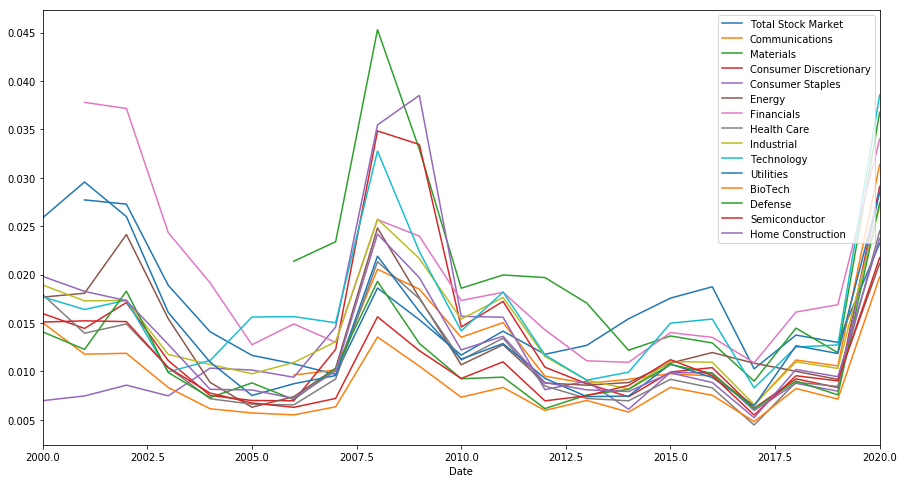

In [39]:
std_dev_yearly
std_dev_yearly.plot(figsize=(15,8))

In [40]:
std_dev_yearly.columns

Index(['Total Stock Market', 'Communications', 'Materials',
       'Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials',
       'Health Care', 'Industrial', 'Technology', 'Utilities', 'BioTech',
       'Defense', 'Semiconductor', 'Home Construction'],
      dtype='object')

In [41]:
df_cat_defensive=std_dev_yearly[['Health Care','Consumer Staples','Utilities','Defense','Home Construction']]
df_cat_aggressive=std_dev_yearly[['Communications','Materials','Financials','Technology','BioTech','Semiconductor','Materials','Energy','Industrial']]



In [42]:
df_cat_defensive.head(3)

,Health Care,Consumer Staples,Utilities,Defense,Home Construction
Date,,,,,
2000,0.017946,0.006987,0.025875,0.014087,0.019822
2001,0.013953,0.007472,0.029569,0.012283,0.018274
2002,0.014908,0.008588,0.025997,0.018297,0.017318


In [43]:
df_cat_aggressive.head(3)

,Communications,Materials,Financials,Technology,BioTech,Semiconductor,Materials,Energy,Industrial
Date,,,,,,,,,
2000,NaN,NaN,NaN,0.017711,0.015036,0.015104,NaN,0.017680,0.018934
2001,NaN,NaN,0.037792,0.016399,0.011789,0.015232,NaN,0.018082,0.017292
2002,NaN,NaN,0.037163,0.017365,0.011878,0.015152,NaN,0.024141,0.017343


In [44]:
df_cat_aggressive.reset_index(inplace=True)

In [45]:
#df_sector_jumps_totals
cols=range(len(df_cat_aggressive.columns))
rows=range(len(df_cat_aggressive.index))
data_list=[]
count=0
for i in rows:
    row=int(i)
    year= int(df_cat_aggressive.loc[row][0])
    sectors=[]
    std=[]
    for j in cols:
        col=int(j)
        sector=df_cat_aggressive.columns[col]
        stddev=df_cat_aggressive.loc[row][col]
        if col !=0:
            # prepare list of values to be entered as columns to df
            sectors.append(sector)
            std.append(stddev)
            data_list.append([year,sectors,std])

In [46]:
df_defensive=pd.DataFrame(data_list)

In [47]:
df_defensive.head(3)

,0,1,2
0,2000,"[Communications, Materials, Financials, Techno...","[nan, nan, nan, 0.01771143747461796, 0.0150363..."
1,2000,"[Communications, Materials, Financials, Techno...","[nan, nan, nan, 0.01771143747461796, 0.0150363..."
2,2000,"[Communications, Materials, Financials, Techno...","[nan, nan, nan, 0.01771143747461796, 0.0150363..."


In [48]:
agg_df = pd.read_csv('aggressive_std.csv')

In [49]:
agg_df.head()

,Date,Communications,Materials,Financials,BioTech,Semiconductor,Energy,Industrial,Technology,Avg Std
0,2000,NaN,NaN,NaN,0.015036,0.015104,0.017680,0.018934,0.017711,0.014078
1,2001,NaN,NaN,0.037792,0.011789,0.015232,0.018082,0.017292,0.016399,0.016655
2,2002,NaN,NaN,0.037163,0.011878,0.015152,0.024141,0.017343,0.017365,0.017577
3,2003,NaN,NaN,0.024343,0.008348,0.010401,0.015455,0.011761,0.009954,0.011466
4,2004,NaN,NaN,0.019156,0.006148,0.007768,0.008876,0.010727,0.011137,0.009116


In [50]:
df_cat_defensive['average'] = df_cat_defensive.mean(numeric_only=True, axis=1)

# Set figure for defensive stocks

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
df_cat_defensive.head()

,Health Care,Consumer Staples,Utilities,Defense,Home Construction,average
Date,,,,,,
2000,0.017946,0.006987,0.025875,0.014087,0.019822,0.016943
2001,0.013953,0.007472,0.029569,0.012283,0.018274,0.016310
2002,0.014908,0.008588,0.025997,0.018297,0.017318,0.017022
2003,0.010414,0.007482,0.016097,0.009895,0.012800,0.011338
2004,0.007185,0.010347,0.010972,0.007303,0.008160,0.008793


In [51]:
df_cat_aggressive['average'] = df_cat_aggressive.mean(numeric_only=True, axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
df_cat_aggressive.set_index('Date', inplace=True)

In [53]:
df_cat_aggressive.head()

,Communications,Materials,Financials,Technology,BioTech,Semiconductor,Materials,Energy,Industrial,average
Date,,,,,,,,,,
2000,NaN,NaN,NaN,0.017711,0.015036,0.015104,NaN,0.017680,0.018934,333.347411
2001,NaN,NaN,0.037792,0.016399,0.011789,0.015232,NaN,0.018082,0.017292,285.873798
2002,NaN,NaN,0.037163,0.017365,0.011878,0.015152,NaN,0.024141,0.017343,286.017577
2003,NaN,NaN,0.024343,0.009954,0.008348,0.010401,NaN,0.015455,0.011761,286.154323
2004,NaN,NaN,0.019156,0.011137,0.006148,0.007768,NaN,0.008876,0.010727,286.294830


In [55]:
df_cat_defensive.head()

,Health Care,Consumer Staples,Utilities,Defense,Home Construction,average
Date,,,,,,
2000,0.017946,0.006987,0.025875,0.014087,0.019822,0.016943
2001,0.013953,0.007472,0.029569,0.012283,0.018274,0.016310
2002,0.014908,0.008588,0.025997,0.018297,0.017318,0.017022
2003,0.010414,0.007482,0.016097,0.009895,0.012800,0.011338
2004,0.007185,0.010347,0.010972,0.007303,0.008160,0.008793


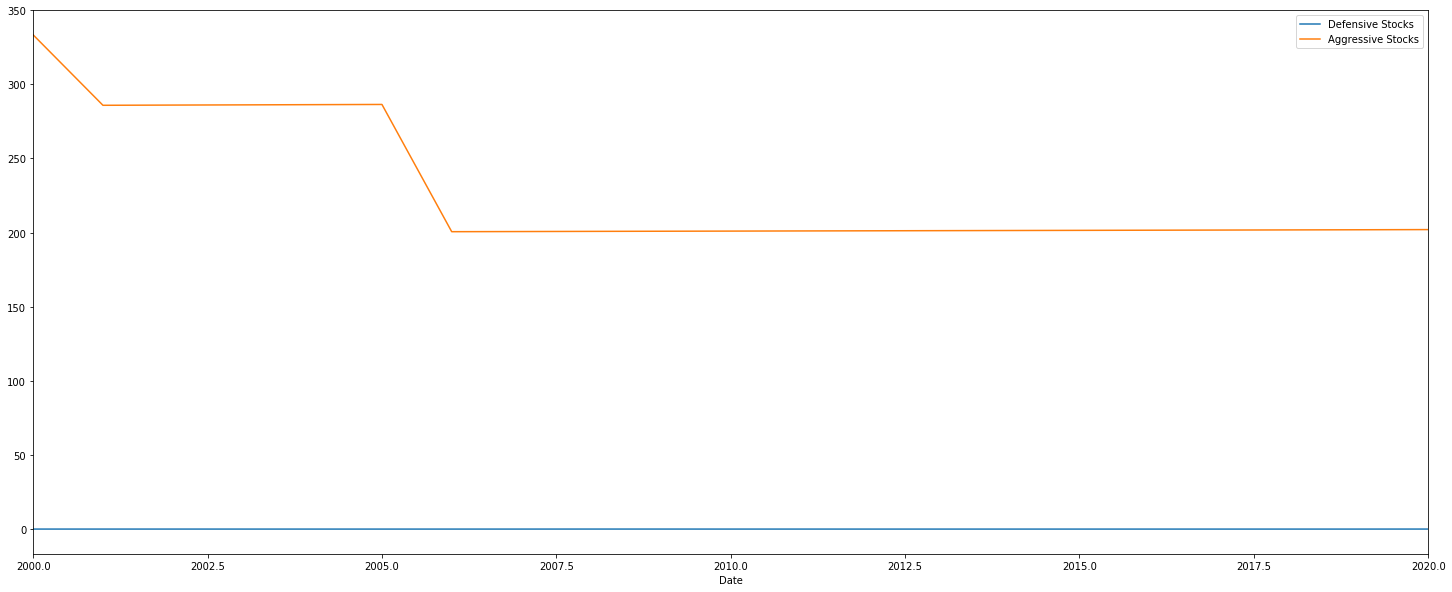

In [54]:
ax1 = df_cat_defensive[['average']].plot(figsize=(25,10))
# Overlay aggressive stocks
df_cat_aggressive[['average']].plot(ax=ax1)
# Set the legend of the figure
ax1.legend(["Defensive Stocks", "Aggressive Stocks"]);

In [ ]:
df_cat_aggressive[['average']].plot(ax=ax1)
# Set the legend of the figure
ax1.legend(["Defensive Stocks", "Aggressive Stocks"]);

In [20]:
#df_sector_jumps_totals
cols=range(len(df_sector_jumps_totals_sliced.columns))
rows=range(len(df_sector_jumps_totals_sliced.index))
data_list=[]
count=0
for i in rows:
    row=int(i)
    year= int(df_sector_jumps_totals_sliced.loc[row][0])
    sectors=[]
    jumps=[]
    for j in cols:
        col=int(j)
        sector=df_sector_jumps_totals_sliced.columns[col]
        jumpcount=int(df_sector_jumps_totals_sliced.loc[row][col])
        if col !=0:
            # prepare list of values to be entered as columns to df
            sectors.append(sector)
            jumps.append(jumpcount)
            data_list.append([year,sector,jumpcount])

NameError: name 'df_sector_jumps_totals_sliced' is not defined